In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:

#import bands as separate 1 band raster
red = rasterio.open(r"D:\GIS\Taiwan\LC08_L1TP_117043_20200825_20200905_01_T1_B4.TIF").read(1) #red
green = rasterio.open(r"D:\GIS\Taiwan\LC08_L1TP_117043_20200825_20200905_01_T1_B3.TIF").read(1)#green
blue = rasterio.open(r"D:\GIS\Taiwan\LC08_L1TP_117043_20200825_20200905_01_T1_B2.TIF").read(1)#blue
nir = rasterio.open(r"D:\GIS\Taiwan\LC08_L1TP_117043_20200825_20200905_01_T1_B5.TIF").read(1) #nir
swir = rasterio.open(r"D:\GIS\Taiwan\LC08_L1TP_117043_20200825_20200905_01_T1_B6.TIF").read(1) #swir
# Return a tuple representing the dimensionality of the Matrix.
red.shape

(7831, 7681)

In [3]:
#取消異常值警示
np.seterr(divide='ignore', invalid='ignore')

ndvi=np.where((nir+red)==0., 0, (nir.astype(float) - red.astype(float))/(nir+red))
ndvi=np.where(ndvi>1, 0, ndvi);ndvi=np.where(ndvi<-1, 0, ndvi)

mndwi=np.where((green+swir)==0, 0, (green.astype(float)-swir.astype(float))/(swir+green))
mndwi=np.where(mndwi>1, 0, mndwi);mndwi=np.where(mndwi<-1, 0, mndwi)

ndbi=np.where((swir+nir)==0, 0, (swir.astype(float)-nir.astype(float))/(swir+nir))
ndbi=np.where(ndbi>1 , 0, ndbi);ndbi=np.where(ndbi<-1, 0, ndbi)

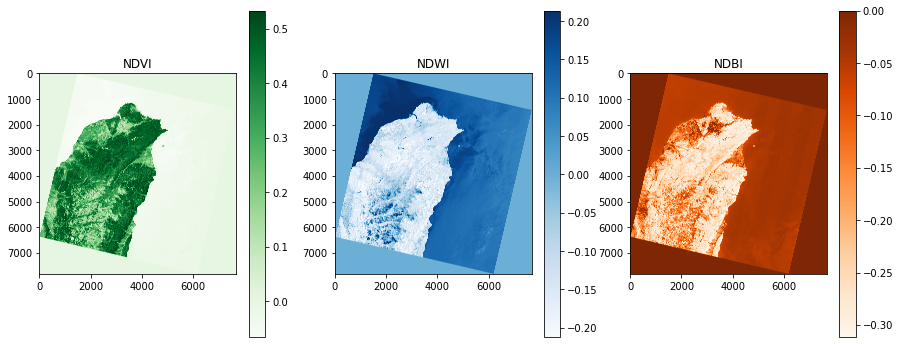

In [4]:
vmin, vmax = np.nanpercentile(ndvi, (2,98))
vmin2,vmax2 = np.nanpercentile(mndwi, (2,98))
vmin3,vmax3 = np.nanpercentile(ndbi, (2,98))
f, axs = plt.subplots(1,3,figsize=(15,6))
plt.subplot(1,3,1)
plt.imshow(ndvi,   cmap='Greens',vmin=vmin,vmax=vmax )
plt.title('NDVI')
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(mndwi,   cmap='Blues',vmin=vmin2,vmax=vmax2 )
plt.title('NDWI')
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(ndbi,   cmap='Oranges',vmin=vmin3,vmax=vmax3 )
plt.title('NDBI')
plt.colorbar()

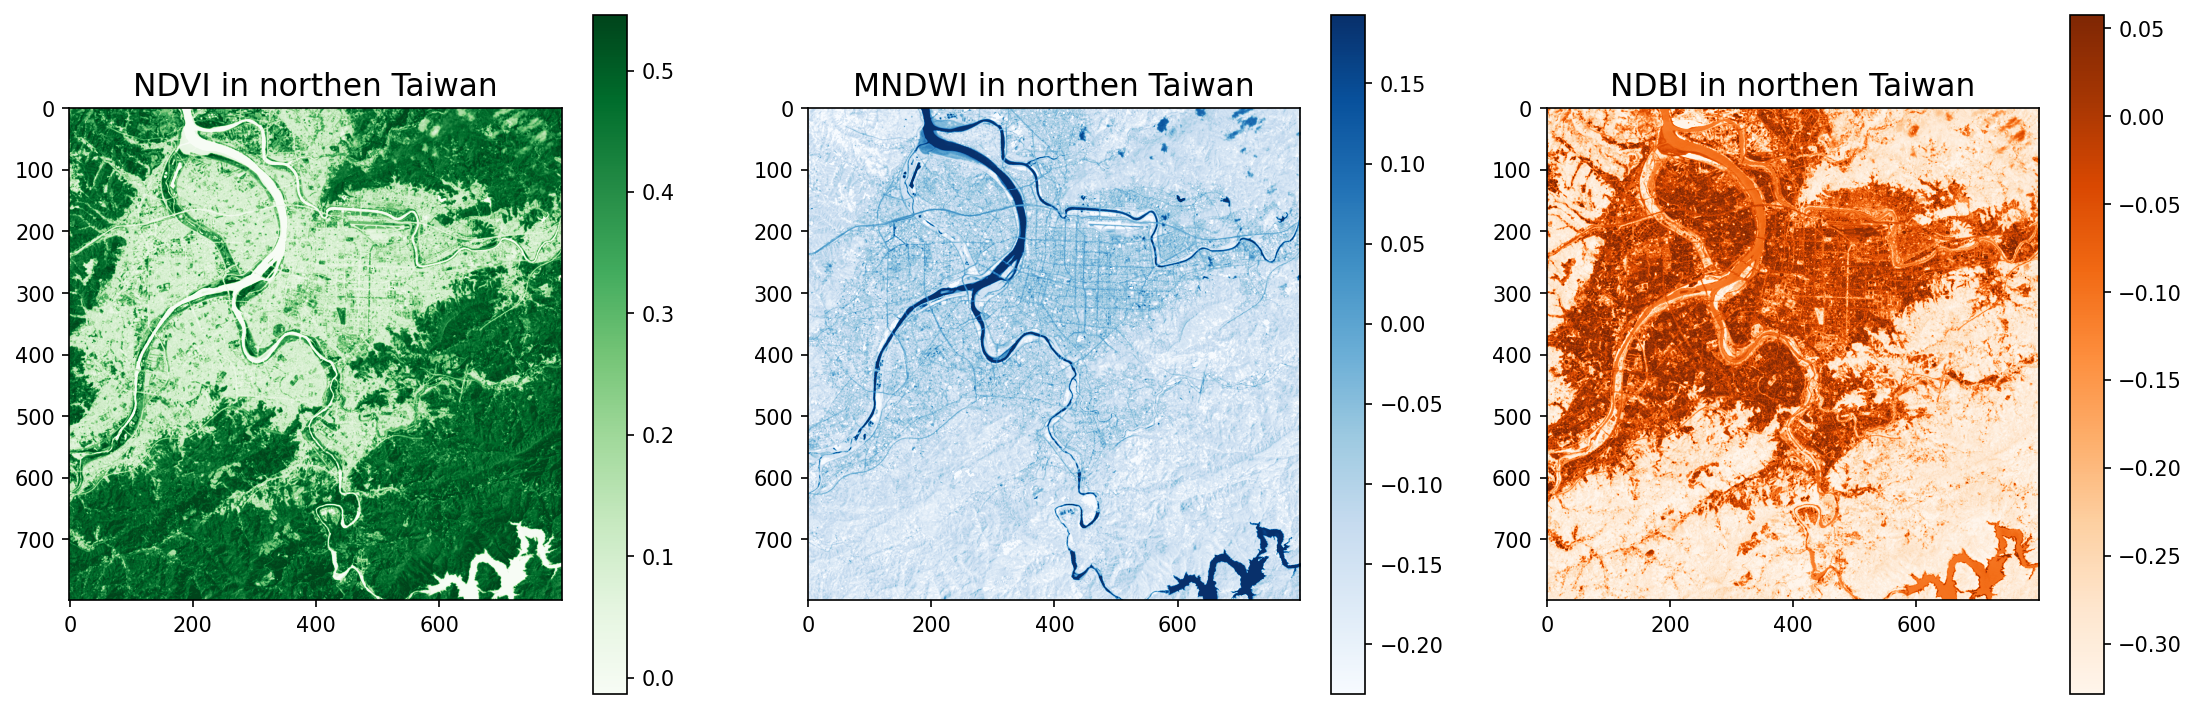

In [5]:
vmin, vmax = np.nanpercentile(ndvi[1800:2600,3000:3800], (2,98))
vmin2,vmax2 = np.nanpercentile(mndwi[1800:2600,3000:3800], (2,98))
vmin3,vmax3 = np.nanpercentile(ndbi[1800:2600,3000:3800], (2,98))
f, axs = plt.subplots(1,3,figsize=(18,6), dpi=150)
plt.subplot(1,3,1)

plt.imshow(ndvi[1800:2600,3000:3800],cmap='Greens',vmin=vmin,vmax=vmax )
plt.title('NDVI in northen Taiwan',fontsize=15)
plt.colorbar()
plt.subplot(1,3,2)
plt.imshow(mndwi[1800:2600,3000:3800],cmap='Blues',vmin=vmin2,vmax=vmax2 )
plt.title('MNDWI in northen Taiwan',fontsize=15)
plt.colorbar()
plt.subplot(1,3,3)
plt.imshow(ndbi[1800:2600,3000:3800],cmap='Oranges',vmin=vmin3,vmax=vmax3 )
plt.title('NDBI in northen Taiwan',fontsize=15)
plt.colorbar()

In [6]:
from sklearn.linear_model import LinearRegression
X = ndvi[1800:2600,3000:3800].reshape(-1,1)
Y = ndbi[1800:2600,3000:3800].reshape(-1,1)
lm = LinearRegression()
lm.fit(X,Y)
r_sq = lm.score(X, Y)
print('y = {:.2f}x+{:.2f}'.format(lm.coef_[0][0],lm.intercept_[0] ))
print('coefficient of determination: %.4f'%r_sq)

y = -0.64x+0.04
coefficient of determination: 0.8507


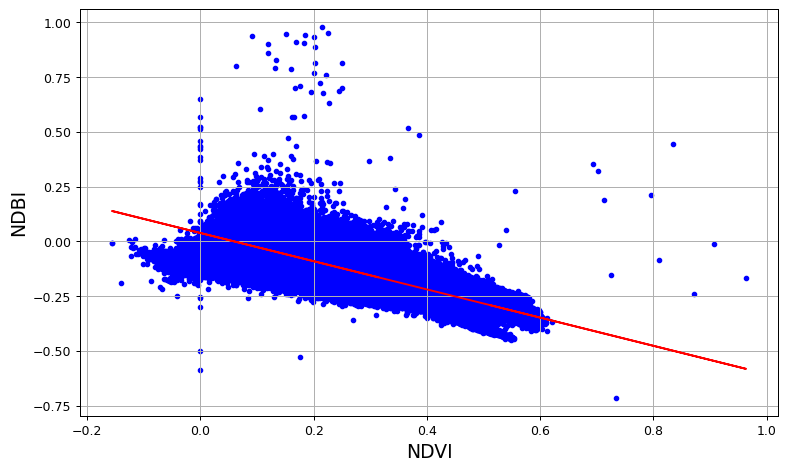

In [7]:
Y_pred = lm.predict(X)
plt.figure(figsize=(10, 6),dpi=90)
plt.grid('#A9A9A9')
plt.scatter(X, Y,color='blue',s=12)
plt.plot(X, Y_pred, color='red')
plt.xlabel('NDVI',fontsize=15)
plt.ylabel('NDBI',fontsize=15)
#plt.savefig(r'D:\python\109-2 Programming\VB.png')
plt.show()